In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from cvxpy import *

from sklearn.datasets import make_blobs, make_moons

import seaborn as sns
sns.set()
sns.set_style('white')

def myplot(X, y, a, b, margin=True, line_alpha=.5, filename=None,callback=None):
    plt.scatter(X[:,0], X[:, 1], c=y, s=75, cmap='cool', alpha=.7)

    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)

    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = np.array([xi, yj]).dot(a) - b

    levels=[0]
    linestyles=['-']
    if margin:
        levels += [-1, 1]
        linestyles += ['--', '--']
        
    plt.contour(X, Y, P, colors='k',
               levels=levels, alpha=line_alpha,
               linestyles=linestyles)
    
    if callback:
        callback()
    
    if filename:
        plt.savefig(filename, bbox_inches='tight')

In [3]:
N = 50
n = 2

X, y = make_blobs(50, centers = 2, random_state=3)
y = 2*y - 1

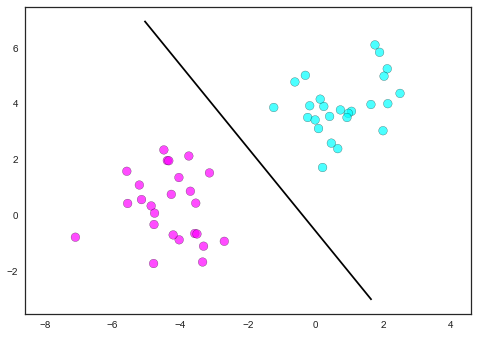

In [4]:
a = Variable(n)
b = Variable()

#obj = Minimize(norm(a[0] - 20*a[1]))
obj = Minimize(norm(a))
constr = [mul_elemwise(y, X*a - b) >= 1]
prob = Problem(obj, constr)
prob.solve()

a = np.array(a.value).flatten()
b = b.value

myplot(X, y, a, b, margin=False, line_alpha=1, filename='fig/first.pdf')

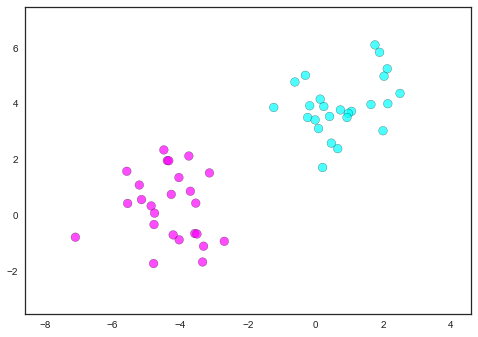

In [5]:
myplot(X, y, a, b, margin=False, line_alpha=0, filename='fig/lin_sep.pdf')

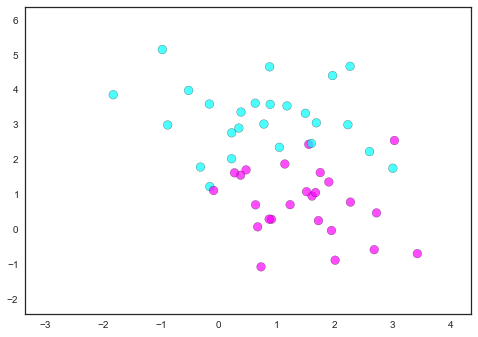

In [120]:
X, y = make_blobs(50, centers = 2, random_state=0, center_box=(-7.5,7.5))
y = 2*y - 1
myplot(X, y, a, b, margin=False, line_alpha=0, filename='fig/approx_lin_sep.pdf')

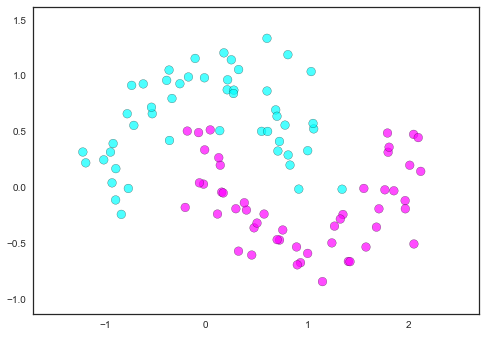

In [121]:
X, y = make_moons(100, noise = .2, random_state=0)
y = 2*y - 1
myplot(X, y, a, b, margin=False, line_alpha=0, filename='fig/non_lin_sep.pdf')

# regions

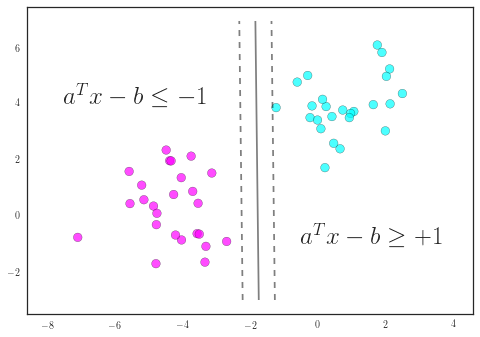

In [28]:
from matplotlib import rc
# latex for text makes math pretty, but rendering super slow
rc('text', usetex=True)

a = Variable(n)
b = Variable()

#obj = Minimize(norm(a))
#obj = Minimize(norm(-10*a[0] - 50*a[1]))
obj = Minimize(norm(.1*a[0] - 10*a[1]))
#c = np.array([10,-4]); obj = Minimize(norm(a-c))

constr = [mul_elemwise(y, X*a - b) >= 1]
prob = Problem(obj, constr)
prob.solve()

a = np.array(a.value).flatten()
b = b.value

def foo():
    plt.text(-7.5, 4, r'$a^Tx - b \leq -1$', fontsize=25)
    plt.text(-.5, -1, r'$a^Tx - b \geq +1$', fontsize=25)
    
myplot(X, y, a, b, margin=True, line_alpha=.5, filename='fig/regions.pdf', callback=foo)

In [ ]:
rc('text', usetex=False)

# which separator?

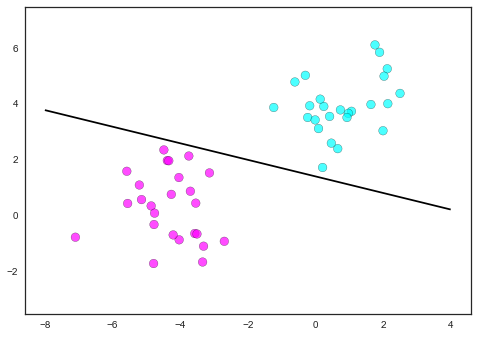

In [57]:
a = Variable(n)
b = Variable()

#obj = Minimize(norm(a))
#obj = Minimize(norm(-10*a[0] - 50*a[1]))
#obj = Minimize(norm(.1*a[0] - 10*a[1]))
c = np.array([10,-4]); obj = Minimize(norm(a-c))

constr = [mul_elemwise(y, X*a - b) >= 1]
prob = Problem(obj, constr)
prob.solve()

a = np.array(a.value).flatten()
b = b.value

myplot(X, y, a, b, margin=False, line_alpha=1, filename='fig/which1.pdf')

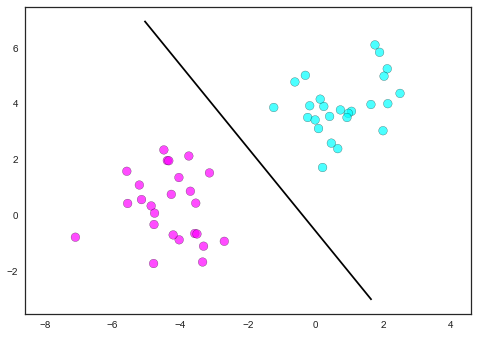

In [58]:
a = Variable(n)
b = Variable()

obj = Minimize(norm(a))
#obj = Minimize(norm(-10*a[0] - 50*a[1]))
#obj = Minimize(norm(.1*a[0] - 10*a[1]))
#c = np.array([10,-4]); obj = Minimize(norm(a-c))

constr = [mul_elemwise(y, X*a - b) >= 1]
prob = Problem(obj, constr)
prob.solve()

a = np.array(a.value).flatten()
b = b.value

myplot(X, y, a, b, margin=False, line_alpha=1, filename='fig/which2.pdf')

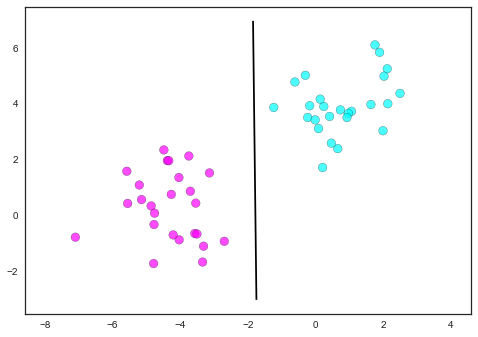

In [59]:
a = Variable(n)
b = Variable()

#obj = Minimize(norm(a))
#obj = Minimize(norm(-10*a[0] - 50*a[1]))
obj = Minimize(norm(.1*a[0] - 10*a[1]))
#c = np.array([10,-4]); obj = Minimize(norm(a-c))

constr = [mul_elemwise(y, X*a - b) >= 1]
prob = Problem(obj, constr)
prob.solve()

a = np.array(a.value).flatten()
b = b.value

myplot(X, y, a, b, margin=False, line_alpha=1, filename='fig/which3.pdf')

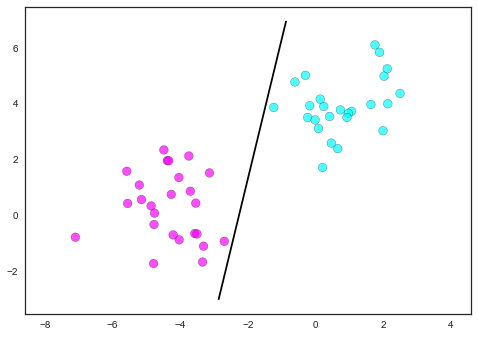

In [60]:
a = Variable(n)
b = Variable()

#obj = Minimize(norm(a))
obj = Minimize(norm(-10*a[0] - 50*a[1]))
#obj = Minimize(norm(.1*a[0] - 10*a[1]))
#c = np.array([10,-4]); obj = Minimize(norm(a-c))

constr = [mul_elemwise(y, X*a - b) >= 1]
prob = Problem(obj, constr)
prob.solve()

a = np.array(a.value).flatten()
b = b.value

myplot(X, y, a, b, margin=False, line_alpha=1, filename='fig/which4.pdf')

# Maximum margin classifier

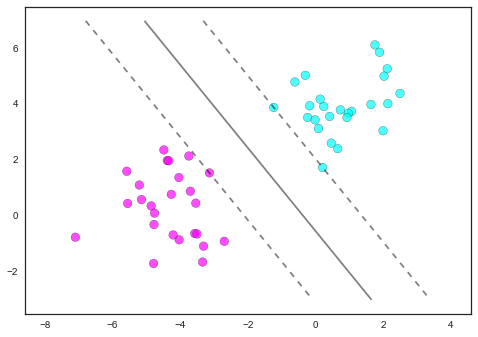

In [5]:
a = Variable(n)
b = Variable()

obj = Minimize(norm(a))
constr = [mul_elemwise(y, X*a - b) >= 1]
prob = Problem(obj, constr)
prob.solve()

a = np.array(a.value).flatten()
b = b.value

myplot(X, y, a, b, margin=True, line_alpha=.5, filename='fig/slab.pdf')

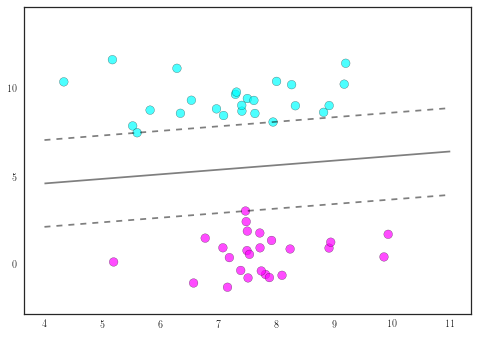

In [41]:
N = 50
n = 2

X, y = make_blobs(N, centers = 2, random_state=8)
y = 2*y - 1

a = Variable(n)
b = Variable()

obj = Minimize(norm(a))
constr = [mul_elemwise(y, X*a - b) >= 1]
prob = Problem(obj, constr)
prob.solve()

a = np.array(a.value).flatten()
b = b.value

myplot(X, y, a, b, margin=True, line_alpha=.5, filename='fig/max_margin.pdf')